# Análisis Catastro Minero Colombiano
Maestría Ciencias de Información y las Comunicaciones - Materia: Big Data.

Por: David Alonso Rueda Rodríguez - 20181395007 (daruedar@correo.udistrital.edu.co)

*Tema*: Análisis Exploratorio de datos

#### Objetivo de la actividad:

Caracterizar las variables consideradas para adelantar el análisis del Catastro Minero Colombiano

#### Fuente de datos:

Los datos se han descargado desde el Tablero de Control del Radicador de Solicitudes Mineras de la Agencia Nacional de Minería.

Link: https://radicador.anm.gov.co/radicador-report/public/TableroSolicitudes.jsf

#### Temas trabajados

A continuación, listado de actividades trabajadas en el pre-procesamiento de datos:
    
##### Pre-procesamiento
    1  Cargar Librerías
    2. Importar datos a pandas
    3. Preparación del grupo de datos
    4. Descripción de los datos
        4.1. Descripción variables numéricas
        4.2. Descripción variables categóricas
    5. Relaciones entre los datos
    
    [Enlace al Título](#idEncabezado1)
    
#### Listado de versiones

1.0.0 Preparación del documento.

## Pre-procesamiento
### 1. Cargar Librerías

Este proyecto utilizará las librerías pandas, seaborn, numpy y matplotlib.

In [1]:
# importat librerías de interés
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### 2. Importar datos con pandas
Se importará el archivo de datos descargado desde el repositorio de kaggle, en este caso se cargarán todos los datos para iniciar el pre-procesamiento con pandas.

In [269]:
# Importar archivo de entrenamiento
ent = pd.read_csv('train.csv')

### 3. Preparación del grupo de datos

In [270]:
# Definición de Función para asignación de código de cabina
def asignarCamarote(cabin_code):
    if pd.isnull(cabin_code):
        category = 'Unknown'
    else:
        category = cabin_code[0]
    return category

In [271]:
# Asignación del dato de la cabina
Deck = np.array([asignarCamarote(cabin) for cabin in ent['Cabin'].values])
ent = ent.assign(Deck = Deck)
# Creación de un nuevo campo derivado para encontrar el tamaño de las familias
ent['FamilySize'] = ent['SibSp'] + ent['Parch'] + 1
# Creación del campo 'Title' y asignación del 'Title' (título en español)
ent['Title'] = ent.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [272]:
# Ajustar las categorías del campo 'Title', utilizando la función reemplazar.
ent['Title'] = ent['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
ent['Title'] = ent['Title'].replace('Ms', 'Miss')
ent['Title'] = ent['Title'].replace('Mme', 'Mrs')
ent['Title'] = ent['Title'].replace('Mlle', 'Miss')

# En esta ocasión se eliminará la el campo 'Cabin'
ent.drop(['Cabin','Name', 'PassengerId', 'Ticket'], 1, inplace=True)
# Asignar valores a los elementos nulos
## Se asumirá que los pasajeros con datos sin asignación embarcaron en la categoría más numerosa
comun = 'S'
# Asignación de valores vacíos
ent['Embarked'] = ent['Embarked'].fillna(comun)

In [273]:
# Asignar valores de edad
means = ent.groupby('Title')['Age'].mean()
title_list = ['Master','Miss','Mr','Mrs','Others']
def reemplazar_edadperdidas(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title 
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) 
# Asignación de valores para edades sin datos       
reemplazar_edadperdidas(means, ent, title_list)
# El cambio se hará utilizando la función map
# Cambiar valores de sitio de Embarque.
# En este caso los valores se han asignado con la siguiente tabla de paso:
# Southampton = S -> 2
# Southampton = Q -> 2
# Southampton = C -> 2
ent['Embarked'] = ent['Embarked'].map({'C':0, 'Q':1, 'S':2})
ent['Sex'] = ent['Sex'].map({'male':0, 'female':1})
ent['Title'] = ent['Title'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Others':4})
le = ppg.LabelEncoder()
ent['Deck'] = le.fit_transform(ent['Deck'])

### 4. EDA

Los datos trabajar en este capítulo corresponden a los procesados en la sección anterior (pre-procesamiento).

In [274]:
# Revisión de datos a trabajar
ent.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2,8,2,2
1,1,1,1,38.0,1,0,71.2833,0,2,2,3
2,1,3,1,26.0,0,0,7.9250,2,8,1,1
3,1,1,1,35.0,1,0,53.1000,2,2,2,3
4,0,3,0,35.0,0,0,8.0500,2,8,1,2


Todas las variables en la tabla ent son numéricas, sin embargo, todas no serán consideradas de esa forma.

| Cualitativas | Cualitativas |
|----------|----------|
| Survived     | Age        |
| Pclass       | Fare        |
| Sex          | FamilySize|
| Embarked     | |
| Deck         | |
| Title        | |

#### Revisión numérica básica de los datos disponibles
La revisión permitirá identificar las principales características de los datos cargados en el DataFrame "ent"

In [275]:
# Revisión de estadísticas descriptivas para todas las variables en el DataFrame
ent.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.759451,0.523008,0.381594,32.204208,1.536476,6.716049,1.904602,1.895623
std,0.486592,0.836071,0.477990,13.278693,1.102743,0.806057,49.693429,0.791503,2.460739,1.613459,0.788465
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,21.845638,0.000000,0.000000,7.910400,1.000000,8.000000,1.000000,1.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,2.000000,8.000000,1.000000,2.000000
75%,1.000000,3.000000,1.000000,35.788991,1.000000,0.000000,31.000000,2.000000,8.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,8.000000,11.000000,4.000000


Se observa que se han generado estadísticas para todo el conjunto de datos. Se puede concluir de la tabla anterior que los datos han sido pre-procesados exitosamente.

Sin embargo, estas descripciones tienen un mayor valor aplicados a las variables numéricas. En la siguiente revisión se analizan únicamente las variables numéricas.

In [276]:
# Revisión de estadísticas descriptivas de las variables numéricas en el DataFrame
ent[['Age', 'Fare', 'FamilySize']].describe()

,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000
mean,29.759451,32.204208,1.904602
std,13.278693,49.693429,1.613459
min,0.420000,0.000000,1.000000
25%,21.845638,7.910400,1.000000
50%,30.000000,14.454200,1.000000
75%,35.788991,31.000000,2.000000
max,80.000000,512.329200,11.000000


### Revisión gráfica de las variables numéricas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a8cb78390>,
      dtype=object)

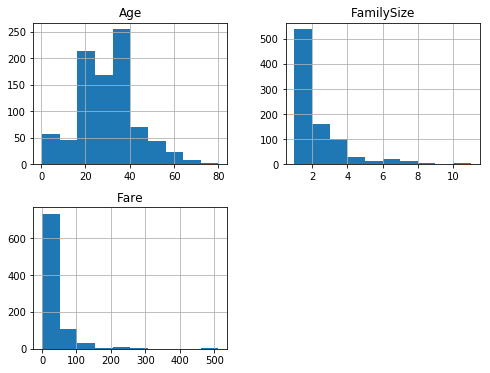

In [277]:
# Generación de histogramas para valores considerados numéricos
ent[['Age', 'Fare', 'FamilySize']].hist(figsize=(8,6))

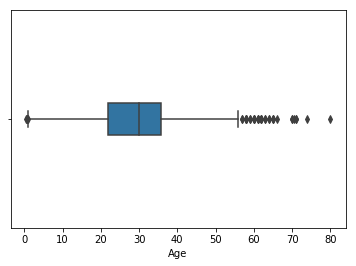

In [278]:
plot = sns.boxplot(x=ent['Age'], orient="h", width=0.15)

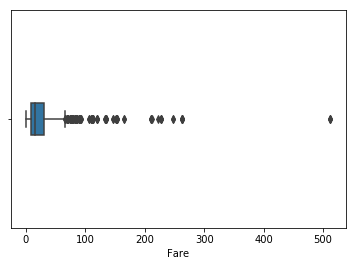

In [279]:
plot = sns.boxplot(x=ent['Fare'], orient="h", width=0.15)

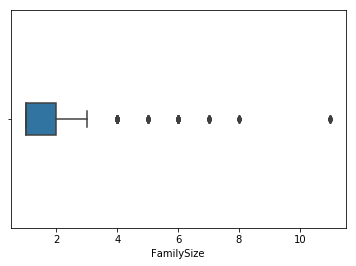

In [280]:
plot = sns.boxplot(x=ent['FamilySize'], orient="h", width=0.15)

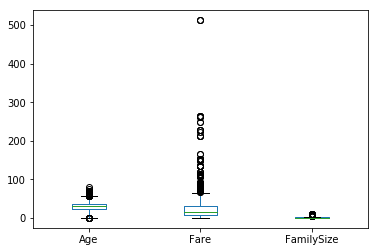

In [281]:
plot2 = ent[['Age', 'Fare', 'FamilySize']].plot.box()

Los histogramas y los digramas de caja entregan unas primera apróximaciones a los datos numéricos trabajados, entre ellos:

##### Age
Esta variable se refiere a la edad de las personas en la muestra de entrenamiento
1. La mayoría de las primeras en el viaje eran menores a los 40 años
2. La participación de la tercera edad en la muestra de datos no sobrepasan las 100 personas
3. La variable edad parece seguir una distribución normal, aunque tiene una ligera carga a la izquierda.
4. La media de la edad de los pasajeros era de 30 años.

##### FamilySize
Esta variable se refiere al tamaño de la familia de las personas en la muestra de entrenamiento
1. Parece que la mayoría de las personas viajaban solas
2. En la muestra las personas con familias numerosas no sobrepasan 150.
3. Se presentan una gráfica totalmente recostada sobre el margen izquierdo de la gráfica.
4. Se resalta que las familias con un número mayor de 3 integrantes erán extrañas entre los pasajeros del barco

##### Fare
Esta variable se refiere a la tarifa pagada por cada persona en la muestra de entrenamiento
1. La mayor cantidad de pasajes vendidos tuvo una tarifa menor de 80 unidades monetarias de la época.
2. Las tarifas mayores a 100 unidades monetarias de la época son realmente atípicas.

### Revisión gráfica de las variables categóricas

In [282]:
# Generación de gráfico de barras para valores considerados categóricos
datos_categoricos = ent[['Survived', 'Pclass', 'Sex', 'Embarked', 'Deck', 'Title']]
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

##### Variable categótica Supervivencia
El gráfico presenta la cantidad de personas que sobrevivieron al naufragio de la nave.

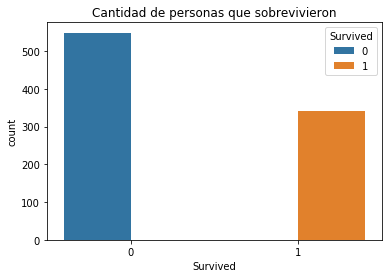

In [283]:
# Gráfica para el valor de Supervivencia
plt.title ("Cantidad de personas que sobrevivieron")
sns.countplot(data = datos_categoricos, x = "Survived", hue="Survived")

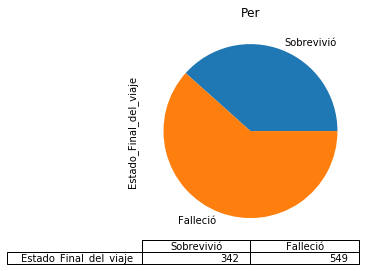

In [284]:
sur = pd.DataFrame({'Estado_Final_del_viaje':[ent['Survived'].sum(), 891-ent['Survived'].sum()]}, index=['Sobrevivió','Falleció'])
plot2 = sur.plot.pie(y='Estado_Final_del_viaje', legend=False, title="Per", table= True)

Del gráfico anterior se observa que el 38%(343 personas) de los pasajeros de la muestra sobrevivieron, mientras el 62% de los pasajeros en la muestras perecieron.

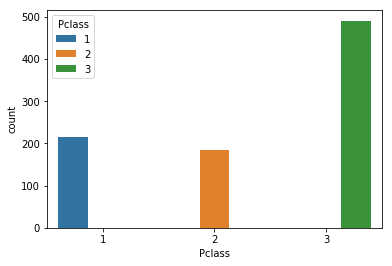

In [285]:
sur = pd.DataFrame({'Clase':[216, 184, 491]}, index=['Primera Clase=1','Segunda Clase=2','Tercera Clase=3'])
sns.countplot(data = datos_categoricos, x = "Pclass", hue = "Pclass")

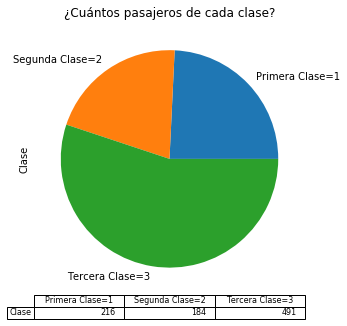

In [286]:
plot2 = sur.plot.pie(y='Clase', legend=False, title="¿Cuántos pasajeros de cada clase?", table=True, figsize=(5,5))

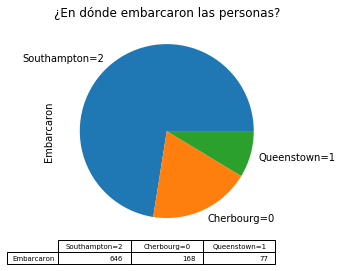

In [287]:
sur = pd.DataFrame({'Embarcaron':[646, 168, 77]}, index=['Southampton=2','Cherbourg=0','Queenstown=1'])
plot2 = sur.plot.pie(y='Embarcaron', legend=False, title="¿En dónde embarcaron las personas?", table=True, figsize=(4,4))

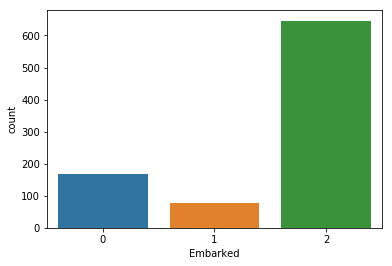

In [288]:
sns.countplot(data = datos_categoricos, x = "Embarked")

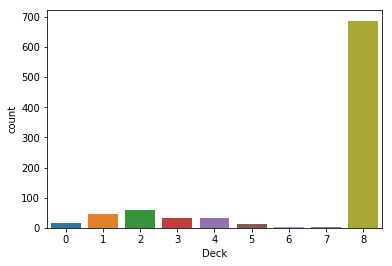

In [289]:
sns.countplot(data = datos_categoricos, x = "Deck")

En este caso el mayor número de datos ha sido clasificado como desconocido. Esta variable se observa fuertemente afectada por la ausencia de datos.

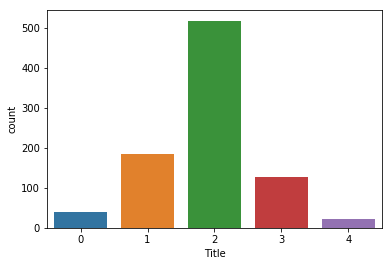

In [290]:
sns.countplot(data = datos_categoricos, x = "Title")

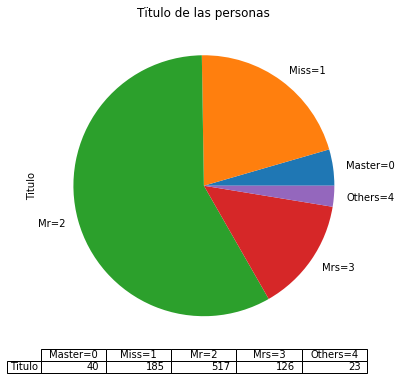

In [291]:
sur = pd.DataFrame({'Titulo':[40, 185, 517, 126, 23]}, index=['Master=0','Miss=1','Mr=2', 'Mrs=3', 'Others=4'])
plot2 = sur.plot.pie(y='Titulo', legend=False, title="Tïtulo de las personas", table=True, figsize=(6,6))

La mayor cantidad de pasajeros erán hombres adultos con un total de 517 (58% del total de pasajeros), mientras que mujeres apenas viajaban 126 (14%).

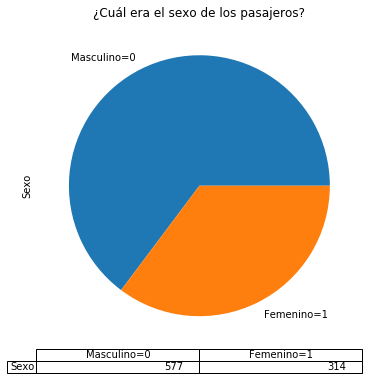

In [292]:
sur = pd.DataFrame({'Sexo':[577, 314]}, index=['Masculino=0','Femenino=1'])
plot2 = sur.plot.pie(y='Sexo', legend=False, title="¿Cuál era el sexo de los pasajeros?", table=True, figsize=(6,6))

Del total de pasajeros en la muestra se tienen que viajaban 577 personas de sexo masculino que representan el 64%, y 314 personas de sexo femenino que representan el 36% de la muestra. Este dato debe contrastarse con la cantidad de individuos de sexo masculino que abordaron el barco.

### 5. Relación Entre los datos
Para realziar esta actividade se utilizará el método de correlación de Pearson.

AttributeError: Unknown property cmap_

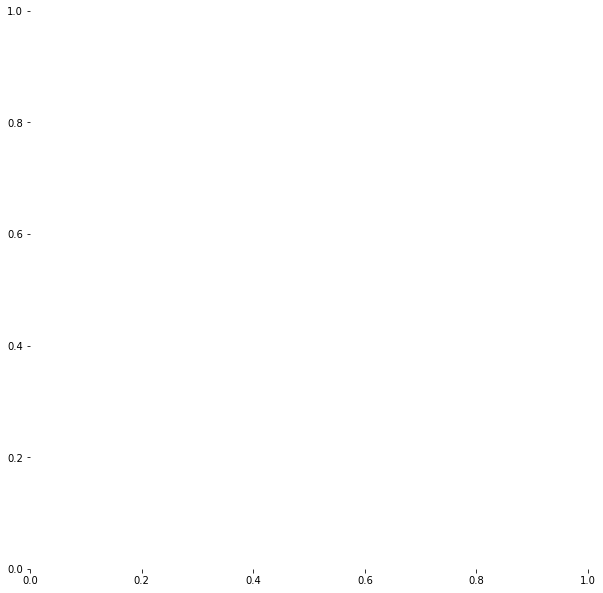

In [293]:
corr = ent.corr()
f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette (220,10, as_cmap=True)
f = sns.heatmap(corr, cmap_="Y1Gn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.tile('Pearson', y=1.05, size=15)